In [13]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

tickers =[
    'SPY', # 미국 주식
    'IEV', # 유럽 주식
    'EWJ', # 일본 주식
    'EEM', # 어머징 주식
    'TLT', # 미국 장기채
    'IEF', # 미국 중기채
    'IYR', # 미국 리츠
    'RWX', # 글로벌 리츠
    'GLD', # 금
    'DBC' # 상품
]

all_data = {}
for ticker in tickers:
    all_data[ticker] = yf.download(ticker, start='1993-01-22')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
prices = pd.DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})
prices = prices.fillna(method='ffill') # NaN값의 경우 이전 값으로 대체해주기

rets = prices.pct_change(1).dropna() # 일간 수익률 나타내기

<AxesSubplot:>

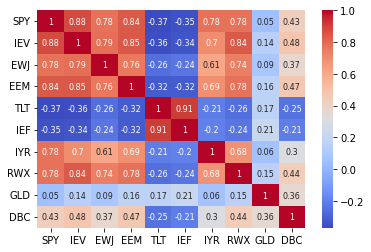

In [18]:
# 각 열들간의 상관관계 나타내기
sns.heatmap(rets.corr().round(2), annot = True, annot_kws = {'size':8}, cmap='coolwarm')